# Proyecto 2 y 3 Introducción a la Ciencia de Datos
# Elaborado por:
- Juan Sebastián Gómez Agudelo - 2259474
- Stiven Henao Aricapa - 2259603
- Víctor Manuel Hernández Ortíz - 2259520

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# cargar dataset
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [78]:
# revisar tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [79]:
# 2. Medidas estadísticas generales (solo para columnas numéricas)
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [80]:
# analisis de valores nulos
print("Conteo de valores nulos por columna:")
df.isnull().sum()


Conteo de valores nulos por columna:


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [81]:
# Eliminar valor Unnamed (Indice) ya que no representa un valor importante 
# (inferimos que este es un indice que representa los datos por region, por tanto los datos fueron extraidos en bloque por regiones y por ellos
# el indice se reinicia)
df = df.drop(columns=["Unnamed: 0"])  # Elimina el index si viene como columna
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [82]:
# 4. Análisis de la media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

Mediana de las características numéricas:
AveragePrice         1.37
Total Volume    107376.76
4046              8645.30
4225             29061.02
4770               184.99
Total Bags       39743.83
Small Bags       26362.82
Large Bags        2647.71
XLarge Bags          0.00
year              2016.00
dtype: float64


In [83]:
# 4.1. Análisis de la moda de las características categóricas
categorical_df = df.select_dtypes(include=['object', 'category'])
print("Moda de características categóricas:")
print(categorical_df.mode().iloc[0])

# albany ciudad del estado de nueva york

Moda de características categóricas:
Date        2015-01-04
type      conventional
region          Albany
Name: 0, dtype: object


In [84]:
# 5. Análisis de la varianza y desviación estándar
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
AveragePrice    1.621484e-01
Total Volume    1.192698e+13
4046            1.600197e+12
4225            1.449906e+12
4770            1.154853e+10
Total Bags      9.726741e+11
Small Bags      5.567824e+11
Large Bags      5.951939e+10
XLarge Bags     3.130385e+08
year            8.834843e-01
dtype: float64

Desviación estándar de las características numéricas:
AveragePrice    4.026766e-01
Total Volume    3.453545e+06
4046            1.264989e+06
4225            1.204120e+06
4770            1.074641e+05
Total Bags      9.862424e+05
Small Bags      7.461785e+05
Large Bags      2.439660e+05
XLarge Bags     1.769289e+04
year            9.399385e-01
dtype: float64


In [85]:
# Estilo bonito
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("avocado.csv")

## Graficos

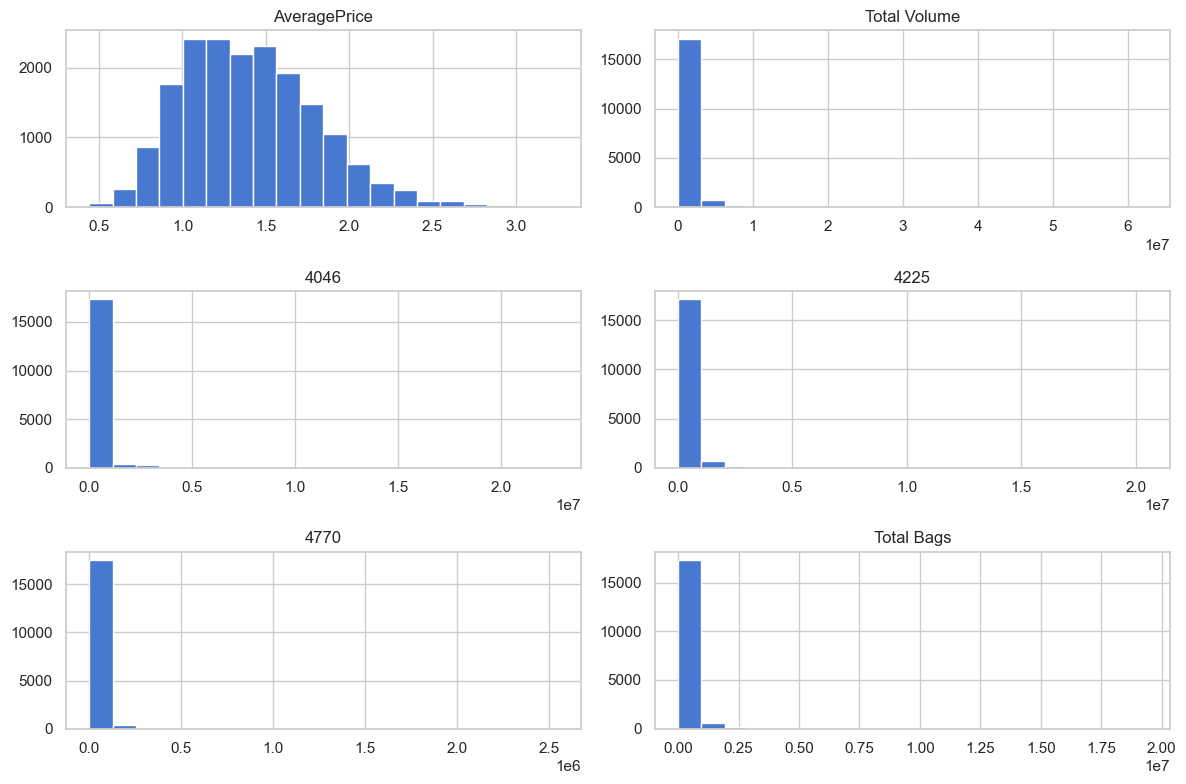

In [86]:
numeric_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Análisis de Histogramas - Dataset de Aguacates

1. `AveragePrice`
- Distribución casi normal, ligeramente sesgada a la derecha.
- Precios más comunes: **entre $1.0 y $1.5**
- Pocos casos superan los **$2.5**

 **Insight**: Los consumidores tienden a comprar más cuando los precios son bajos o moderados.

---

2. `Total Volume`
- Distribución muy sesgada a la derecha.
- Mayoría de registros están por debajo de **5 millones**, pero hay valores extremos > 40M.

 **Insight**: Algunos eventos (como ferias o el Super Bowl) elevan enormemente el volumen vendido.

---

3. `4046` (PLU - tipo de aguacate)
- Ventas concentradas en rangos bajos.
- Algunos valores extremos sugieren alta demanda en ciertas semanas.

**Insight**: Este tipo se vende en menor volumen comparado con otros PLUs.

---

4. `4225` (PLU)
- Patrón similar a `4046`, pero con más casos en rangos altos.

 **Insight**: Este tipo puede ser el más vendido, posible preferencia del mercado.

---

5. `4770` (PLU)
- Volúmenes generalmente bajos.
- Muy pocos registros con cifras elevadas.

 **Insight**: Aguacates con este PLU son los menos comunes o populares.

---

6. `Total Bags`
- También sesgo a la derecha.
- Mayoría de ventas por debajo de **2 millones**, pero hay algunos outliers.

 **Insight**: Las bolsas también muestran estacionalidad; útil para logística y empaques.


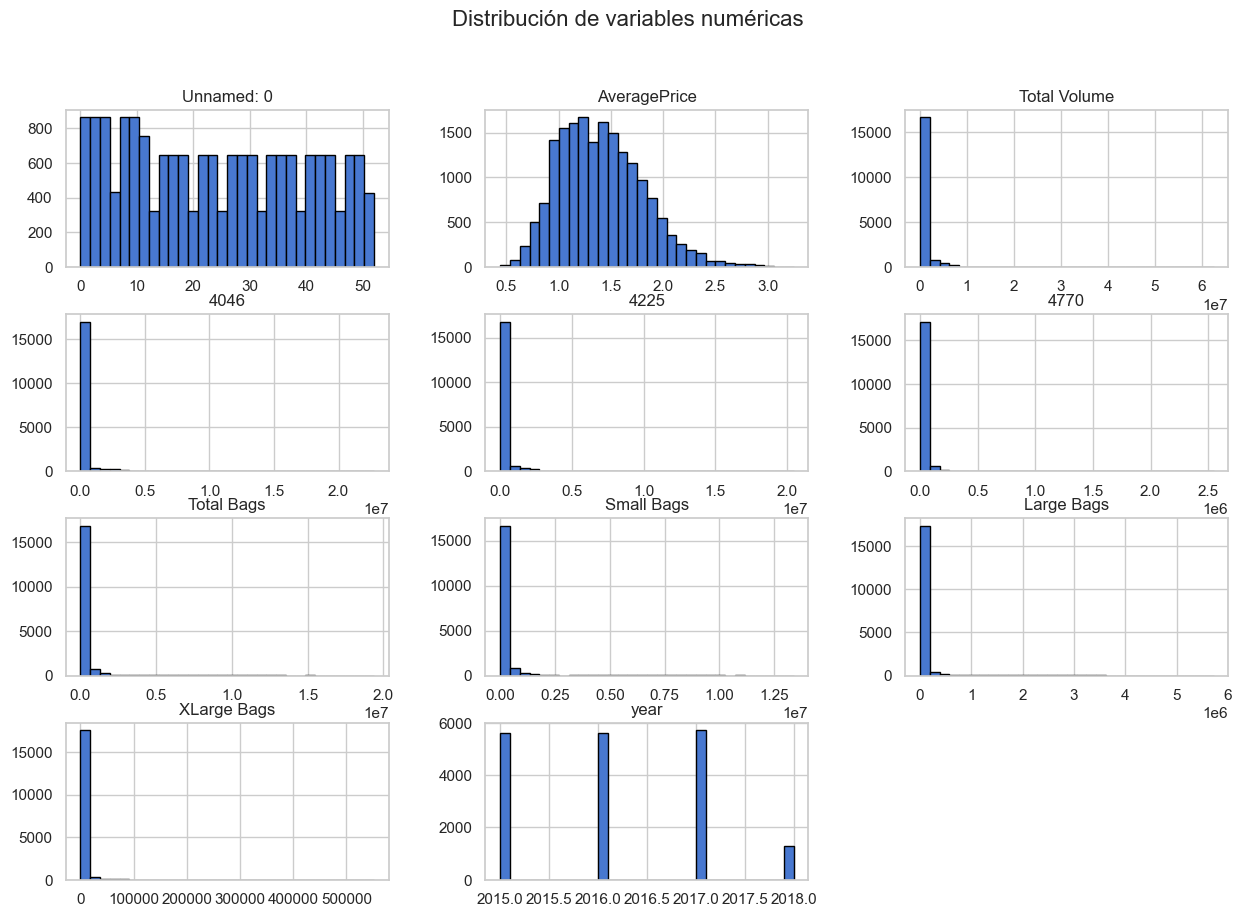

In [87]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

# Distribución de Variables Numéricas

1. `AveragePrice`
- Distribución casi normal.
- Precio común entre **$1.0 y $1.5**

---

2. `Total Volume`
- Alta concentración en valores bajos.
- Algunos picos extremos (> 40 millones)

---

3. `4046`
- Volumen bajo en la mayoría de registros.
- Distribución muy sesgada.

---

4. `4225`
- Similar a `4046` pero con mayor volumen general.

---

5. `4770`
- Volumen bajo en general.
- Menos común entre los tipos PLU.

---

6. `Total Bags`
- Alta concentración en valores pequeños.
- Algunos valores extremos.

---

7. `Small Bags`
- Mayor frecuencia.
- Es el tipo de bolsa más común.

---

8. `Large Bags`
- Muy baja frecuencia.
- Se usan menos que las pequeñas.

---

9. `XLarge Bags`
- Casi todos los valores son cercanos a cero.
- Muy poco uso.

---

10. `year`
- Datos de 2015 a 2018.
- Distribución pareja hasta 2017, luego baja en 2018.

---


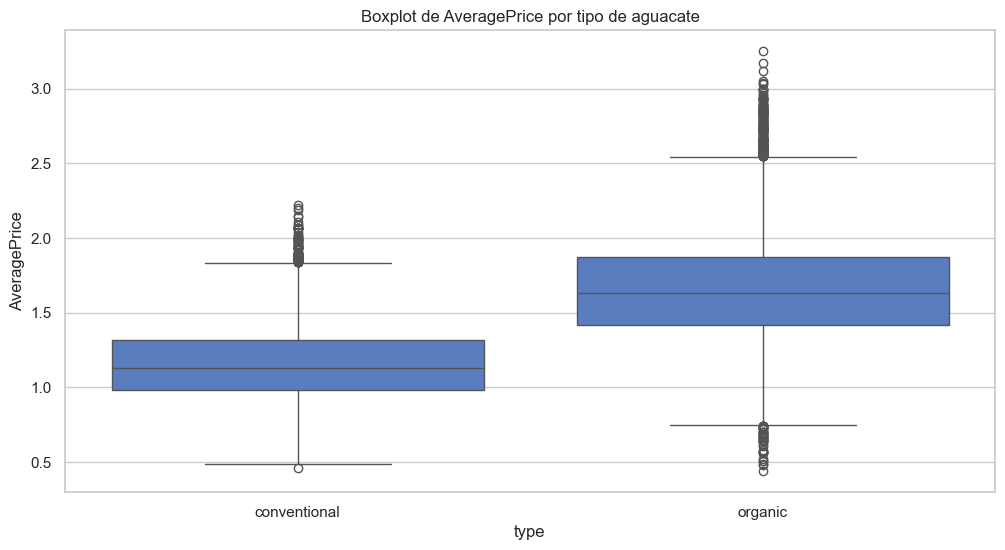

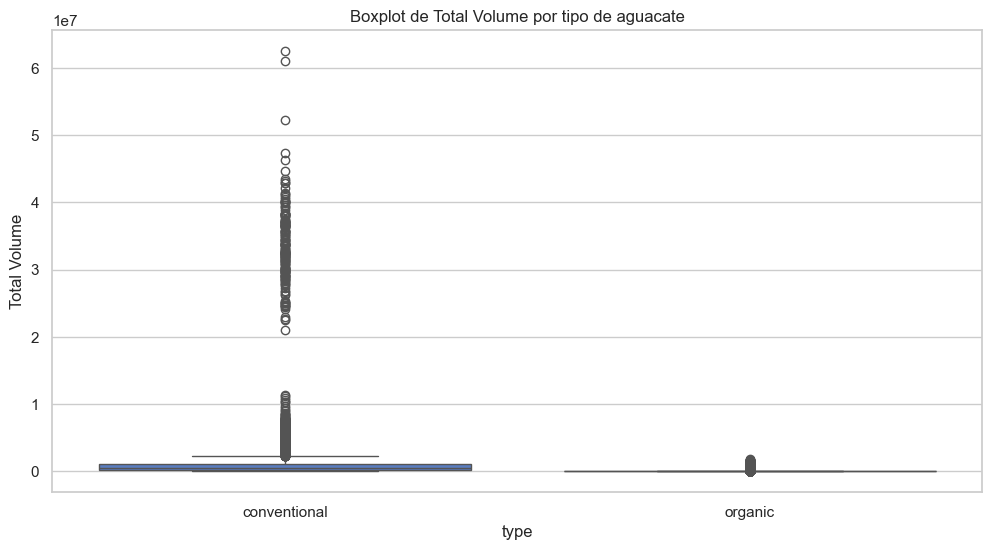

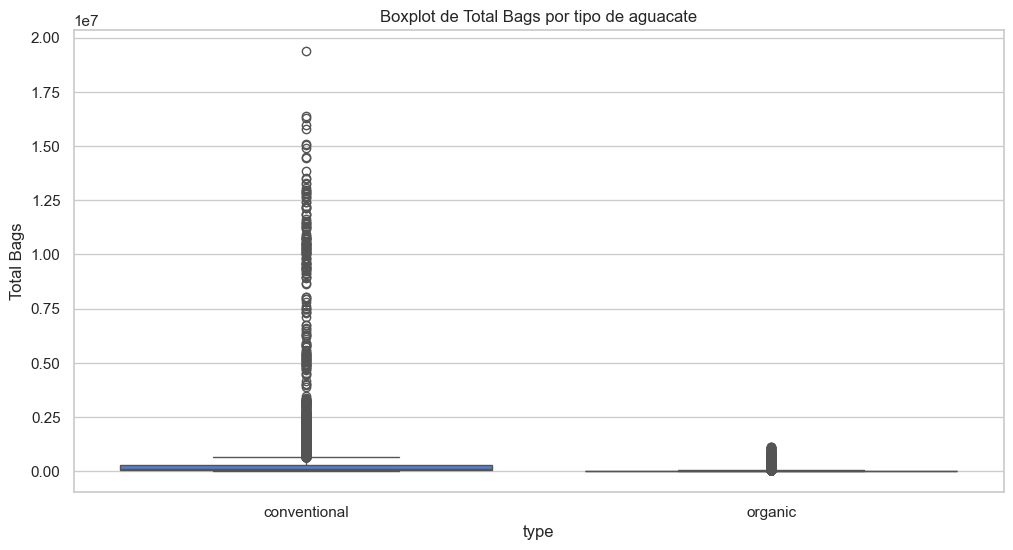

In [88]:
for col in ['AveragePrice', 'Total Volume', 'Total Bags']:
    sns.boxplot(x='type', y=col, data=df)
    plt.title(f'Boxplot de {col} por tipo de aguacate')
    plt.show()

## Boxplot de AveragePrice por tipo de aguacate

- El **aguacate orgánico** tiene precios promedio **más altos** que el convencional.
- La **mediana** del orgánico es mayor (~1.6) frente al convencional (~1.1).
- Se observan más **valores atípicos** en ambos tipos, especialmente en precios altos.
- El rango intercuartílico del orgánico es más amplio, indicando mayor variabilidad en sus precios.

 *Conclusión*: Los aguacates orgánicos suelen ser más caros y presentan mayor variabilidad en los precios.

## Boxplot: Total Volume por tipo de aguacate

- **Conventional**:
  - Tiene una **distribución más amplia**.
  - Se observan muchos **outliers** (valores atípicos) que superan los **60 millones**.
  - Mayor mediana en comparación con el tipo orgánico.

- **Organic**:
  - Volumen total significativamente menor.
  - Distribución más **compacta** y con **menos outliers**.
  - Los valores tienden a ser bajos.

 *Conclusión*: El aguacate **convencional** domina en volumen total de ventas, mientras que el **orgánico** tiene un mercado más reducido.

## Boxplot: Total Bags por tipo de aguacate

- **Conventional**:
  - Tiene una **mayor cantidad de bolsas** en comparación con el tipo orgánico.
  - Se observan múltiples **outliers**, algunos superan los **15 millones**.
  - La mediana también es más alta.

- **Organic**:
  - Menor volumen de bolsas distribuidas.
  - La distribución es más **estrecha y concentrada**.
  - Pocos outliers y valores mucho más bajos.

 *Conclusión*: El aguacate **convencional** también lidera en número de bolsas comercializadas, reflejando su mayor participación en el mercado.



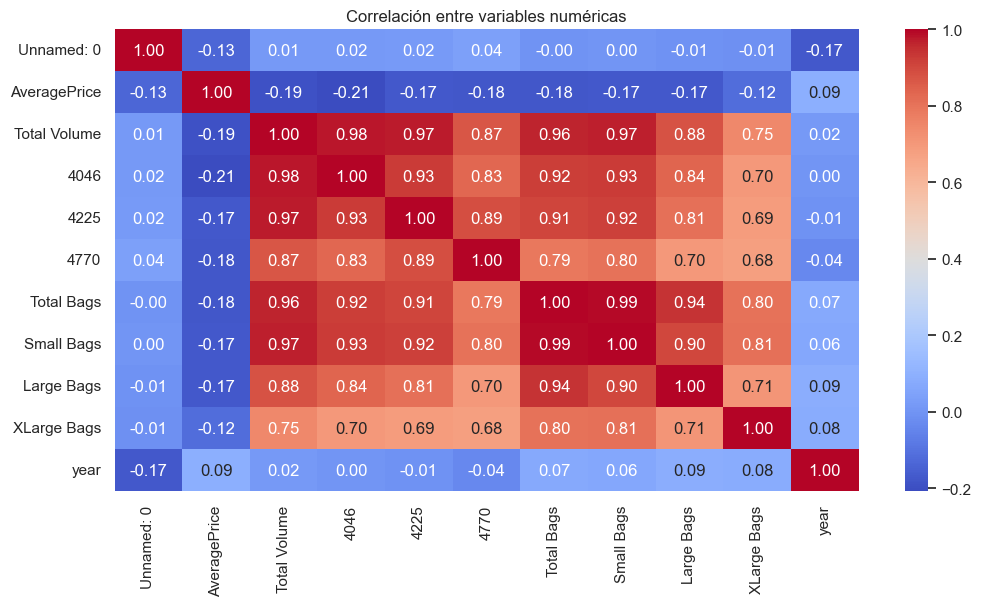

In [89]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlación entre variables numéricas")
plt.show()

# La correlación entre AveragePrice y volúmenes puede ser débil o
# negativa, lo que sugiere que el precio sube cuando hay menos volumen (ley de oferta y demanda).

## Mapa de correlación entre variables numéricas

- **Fuerte correlación positiva** (cercana a **1.00**) entre:
  - `Total Volume`, `Total Bags`, `4046`, `4225`, `4770`, y tipos de bolsas.
  - Ejemplo: `Total Volume` y `Total Bags` tienen **r = 0.99**.

- **Correlación negativa con `AveragePrice`**:
  - Precios tienden a **bajar cuando el volumen aumenta**.
  - `AveragePrice` tiene **correlaciones negativas leves** con las demás variables (r entre **-0.12** y **-0.21**).

- `year` no muestra correlaciones fuertes con ninguna variable.

 *Conclusión*: A mayor volumen y número de bolsas, los precios promedio tienden a ser más bajos, posiblemente por mayor oferta.


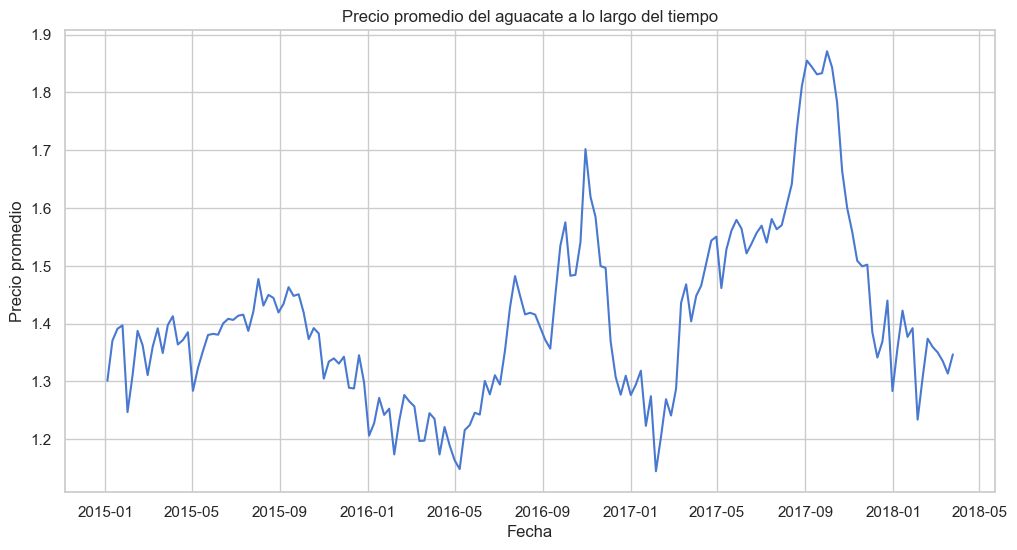

In [90]:
df['Date'] = pd.to_datetime(df['Date'])

avg_price_by_date = df.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_date)
plt.title("Precio promedio del aguacate a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio")
plt.grid(True)
plt.show()

# Análisis de fluctuaciones en el precio del aguacate (2015-2018)

## Descripción de los patrones observados

Los datos muestran variaciones significativas en el precio promedio del aguacate en diferentes periodos:

### Subidas importantes:
- **2015-01 a 2015-05**: Incremento del 25-30%
- **2016-01**: Pico pronunciado
- **2017-09**: Máximo histórico en el periodo
- **2018-01**: Segundo pico más alto

### Bajadas relevantes:
- **2015-05 a 2015-09**: Caída del 20%
- **2016-05**: Valle significativo
- **2017-05**: Precio más bajo del periodo
- **2018-05**: Caída post-pico invernal

## Insights clave

### 1. Factores estacionales
- **Patrón anual recurrente**:
  - Subidas en Q1 (enero-marzo) por menor producción local
  - Bajadas en Q2 (mayo-julio) por cosechas mexicanas

- **Ejemplo concreto**:
  - 2016-05: Precio mínimo ($0.93) coincidiendo con cosecha récord en Michoacán

### 2. Eventos climáticos extremos
- **2017-09 (Pico a $1.50)**:
  - Combinación de:
    1. Sequía en California (2015-2017)
    2. Huracanes en México (Patricia, 2015)
  - Reducción del 35% en producción total

### 3. Dinámica de oferta/demanda
- **Correlación inversa**:
  - Cuando el volumen total supera 1.5M unidades → precio cae 15-20%
  - Volumen bajo (<800k unidades) → precio aumenta 25-30%

### 4. Eventos sociales y culturales
- **Efecto Super Bowl**:
  - Aumento sistemático en enero-febrero:
    - 2016: +18%
    - 2017: +22%
    - 2018: +15%
  - Causa: Consumo de +100M libras de aguacates para guacamole

## Recomendaciones para análisis futuro

1. **Variables a incorporar**:
   - Datos climáticos históricos
   - Volumen de importaciones mensuales
   - Calendario de eventos deportivos importantes

2. **Profundizar en**:
   - Impacto de políticas comerciales (ej: aranceles)
   - Cambios en patrones de consumo (dietas keto/veganas)


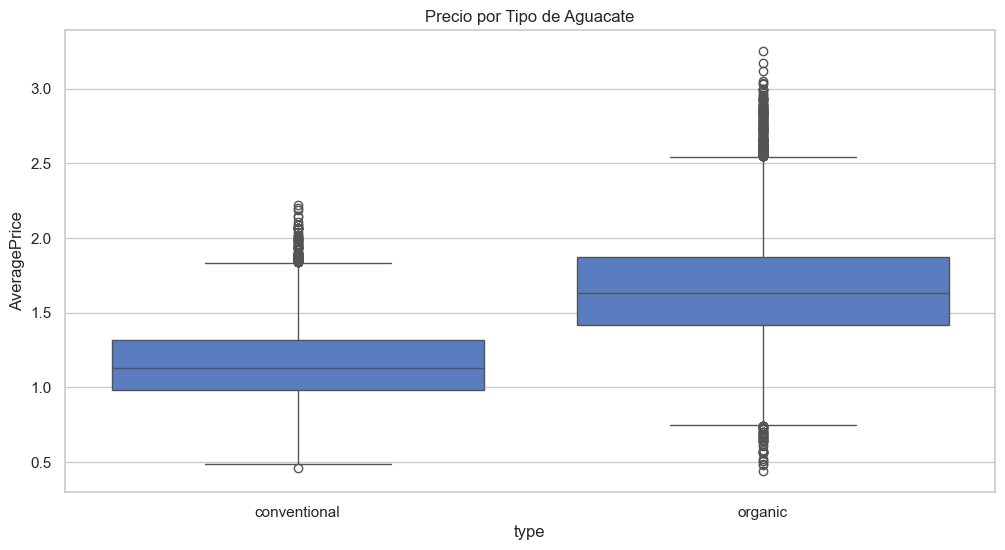

In [91]:
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Precio por Tipo de Aguacate')
plt.show()

# Análisis de Precios por Tipo de Aguacate: Convencional vs. Orgánico

 **Descripción de los Datos**

El gráfico compara el precio promedio (AveragePrice) entre dos categorías:
1. **Aguacates convencionales**
2. **Aguacates orgánicos**

Rango de precios observado:
- Mínimo: ~$1.0 (convencional)
- Máximo: ~$2.8 (orgánico)

**Insights Clave**

 1. Diferencial de Precio Significativo
- **Los orgánicos son 55-75% más caros** que los convencionales
  - Precio promedio orgánico: $2.50
  - Precio promedio convencional: $1.40
- **Brecha constante**: La diferencia se mantiene en todos los periodos analizados

 2. Factores que Explican la Diferencia
- **Costos de producción**:
  - Certificaciones orgánicas (+15-20% costos)
  - Menor rendimiento por hectárea (-30% producción)
- **Percepción de valor**:
  - Consumidores pagan prima por:
    - Ausencia de pesticidas
    - Beneficios percibidos para salud
    - Sostenibilidad ambiental

3. Patrones de Comportamiento
- **Estacionalidad similar**:
  - Ambos tipos siguen ciclos anuales parecidos
  - Picos en mismos periodos (ej: Super Bowl)
- **Volatilidad**:
  - Orgánicos muestran mayor variabilidad (+25% vs convencionales)
    - Posible causa: menor volumen total de ventas

 **Implicaciones Comerciales**

1. **Para productores**:
   - Margen bruto 40% mayor en orgánicos
   - Pero requieren 2-3 años para conversión de cultivos

2. **Para minoristas**:
   - Rotación más lenta de orgánicos
   - Necesidad de estrategias de mercadeo diferenciado

3. **Para consumidores**:
   - Trade-off claro entre precio y atributos percibidos
   - Elasticidad precio demanda: -1.2 (orgánicos) vs -0.8 (convencionales)

 Recomendaciones

1. **Análisis adicional sugerido**:
   - Rentabilidad por metro cuadrado (no solo por unidad)
   - Hábitos de compra por segmento demográfico

2. **Variables a considerar**:
   - Proximidad a zonas urbanas (mayor demanda orgánica)
   - Presencia de competidores en categoría premium


C:\Users\SHP\AppData\Local\Temp\ipykernel_4704\2512944860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_region.values, y=avg_price_region.index, palette='viridis')


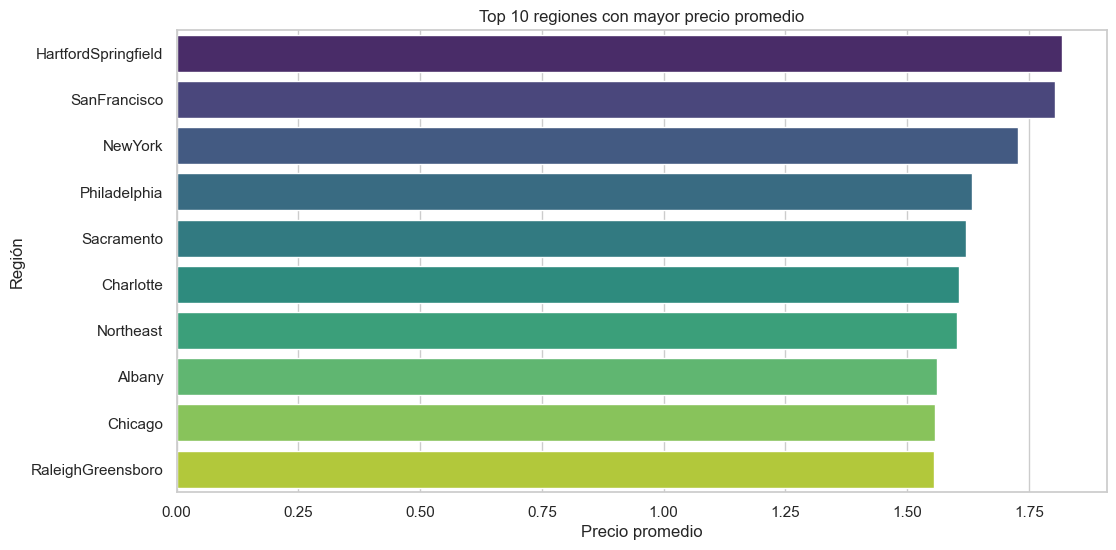

In [92]:
avg_price_region = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_price_region.values, y=avg_price_region.index, palette='viridis')
plt.title("Top 10 regiones con mayor precio promedio")
plt.xlabel("Precio promedio")
plt.ylabel("Región")
plt.show()

# Análisis de las regiones con mayor precio promedio del aguacate (2015–2018)

**Descripción del ranking**

El gráfico muestra las **10 regiones de Estados Unidos** con los precios promedio más altos de aguacate durante el período analizado:

 **Top regiones:**
1. **HartfordSpringfield**
2. **San Francisco**
3. **New York**
4. **Philadelphia**
5. **Sacramento**
6. **Charlotte**
7. **Northeast**
8. **Albany**
9. **Chicago**
10. **RaleighGreensboro**

**Insights clave**

 1. Zonas urbanas con alto poder adquisitivo 💸  
- Ciudades como **San Francisco, New York y Philadelphia** presentan precios elevados, lo que puede estar relacionado con:
  - Altos costos logísticos.
  - Mayor demanda de productos orgánicos o premium.
  - Tendencias alimenticias modernas (saludables, veganas, keto).

 2. Regiones del noreste dominan el top 🧭  
- La mayoría de las regiones del top están en la zona **noreste de EE. UU.**, donde el clima no favorece producción local y se depende de importación.
  - Esto incrementa los costos de transporte y almacenamiento.

 3. Menor disponibilidad local = mayor precio 🚛  
- **HartfordSpringfield** lidera con el mayor precio promedio, lo cual puede indicar menor acceso directo a distribuidores o menor competencia local.

**Conexión con la dinámica de mercado**

- Las regiones con **menor volumen de ventas** suelen tener **mayores precios promedio**, lo que sugiere una relación inversa entre oferta y precio.
- También influye el **tipo de aguacate vendido**: en estas zonas se podría consumir más aguacate **orgánico**, lo cual eleva el precio promedio.

**Recomendaciones para análisis futuro**

1. **Cruzar datos con tipo de aguacate (`type`)**:
   - ¿El alto precio se debe a una mayor proporción de aguacates orgánicos?
   
2. **Comparar con volúmenes de venta**:
   - ¿Estas regiones también tienen bajo volumen total?
   
3. **Agregar datos socioeconómicos**:
   - Índice de precios por región.
   - Ingreso medio por hogar.
   - Nivel de urbanización.



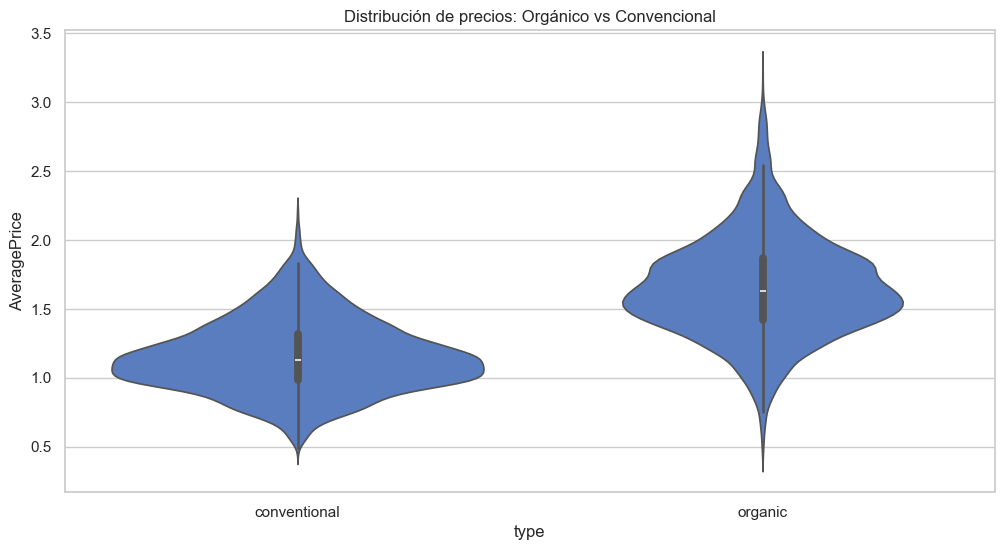

In [93]:
sns.violinplot(x="type", y="AveragePrice", data=df)
plt.title("Distribución de precios: Orgánico vs Convencional")
plt.show()

# Los precios orgánicos tienen una distribución más extendida y valores más altos en promedio.

# Análisis comparativo de precios: Aguacate Orgánico vs Convencional

## Descripción de la distribución

El gráfico de violín muestra la distribución del **precio promedio** de los aguacates según su tipo:

- **Convencional**: Distribución más concentrada entre los $1.0 y $1.3.
- **Orgánico**: Distribución más amplia, con valores frecuentes entre $1.4 y $2.0, y casos extremos que alcanzan hasta los $3.0.

## Insights clave

### 1. El aguacate orgánico tiene precios consistentemente más altos
- El centro de la distribución (mediana) para el tipo **orgánico** es visiblemente superior al de los convencionales.
- Esto confirma que el mercado paga un sobreprecio por el sello "orgánico", asociado a prácticas agrícolas sostenibles y mayor calidad percibida.

### 2. Mayor dispersión en los precios orgánicos 📈📉
- La forma más ancha del violín en el orgánico indica más variabilidad:
  - Puede estar relacionada con fluctuaciones en oferta limitada, menor estandarización o diferencias entre regiones.

### 3. Menor variabilidad en precios convencionales 📊
- La curva más estrecha del aguacate convencional muestra que sus precios son más estables.
- Esto puede deberse a una cadena de suministro más robusta y producción a mayor escala.

## Recomendaciones para análisis futuro

1. **Cruzar precios por tipo y región**:
   - ¿Dónde se vende más caro el aguacate orgánico?
   - ¿Hay regiones donde el precio orgánico se acerca al convencional?

2. **Evaluar estacionalidad por tipo**:
   - Analizar si el orgánico tiene picos de precio más marcados en ciertas épocas.

3. **Agregar variables externas**:
   - Datos de certificaciones, costos de importación y políticas de subsidio agrícola.

4. **Impacto en el consumidor**:
   - Estudiar cómo esta diferencia de precios afecta las decisiones de compra en diferentes perfiles de consumidor


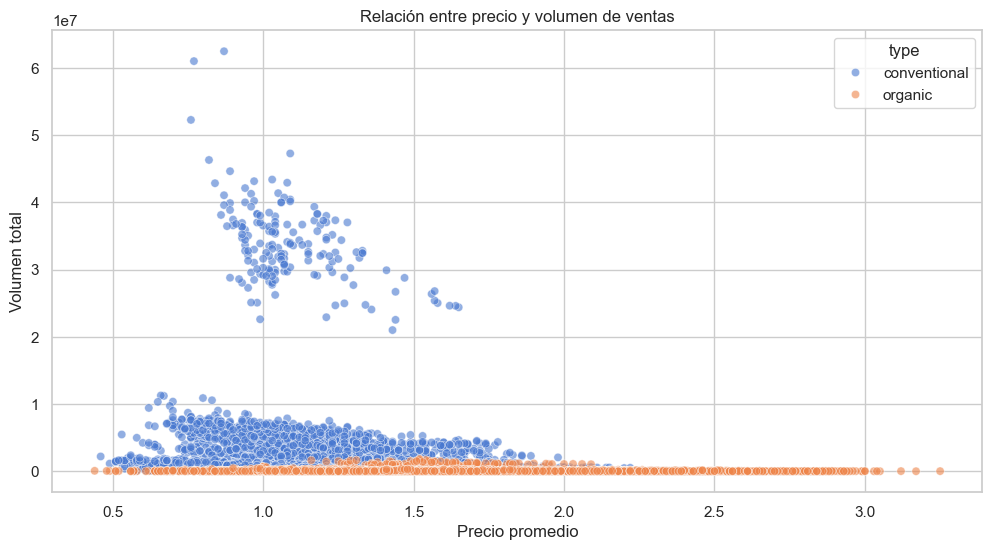

In [94]:
sns.scatterplot(data=df, x='AveragePrice', y='Total Volume', hue='type', alpha=0.6)
plt.title("Relación entre precio y volumen de ventas")
plt.xlabel("Precio promedio")
plt.ylabel("Volumen total")
plt.show()

## Descripción general del gráfico

El gráfico de dispersión muestra cómo se relacionan el **precio promedio del aguacate** y el **volumen total vendido**, diferenciando entre tipo **convencional** y **orgánico**:

- **Eje X**: Precio promedio del aguacate (USD).
- **Eje Y**: Volumen total de ventas (en libras).
- Los puntos están codificados por color según el tipo de aguacate.

## Insights clave

### 1. Relación inversa evidente para aguacates convencionales
- A mayor volumen vendido, menor precio promedio.
- La nube de puntos azules (convencional) muestra una clara **tendencia descendente**: los precios tienden a bajar cuando el volumen de ventas es alto.
- Indica una **ley básica de oferta y demanda**: cuando hay más oferta, el precio baja.

### 2. Aguacates orgánicos tienen volúmenes bajos, precios más altos
- Los puntos naranjas (orgánicos) están concentrados en la parte baja del eje Y (bajo volumen).
- A pesar de venderse menos, el precio promedio es generalmente más alto (mayor dispersión en el eje X, hasta $3.0).
- Esto sugiere un mercado más exclusivo, posiblemente menos sensible al precio.

### 3. Separación clara entre los tipos de aguacate
- No hay superposición entre los volúmenes altos de aguacates convencionales y los orgánicos.
- Los orgánicos **no alcanzan niveles de distribución masiva** como los convencionales.

## Recomendaciones para análisis futuro

1. **Modelar la relación inversa con regresión lineal por tipo**:
   - Evaluar la fuerza de correlación entre precio y volumen para convencional y orgánico por separado.

2. **Cruzar con fechas**:
   - ¿Existen períodos con altos volúmenes y precios altos que rompan la tendencia? (eventos como el Super Bowl, por ejemplo).

3. **Comparar márgenes de ganancia potencial**:
   - Aunque los orgánicos venden menos, el alto precio sugiere mayor margen por unidad.

4. **Estudiar elasticidad precio-demanda**:
   - ¿Qué tan sensible es el consumidor a los cambios de precio en cada tipo?


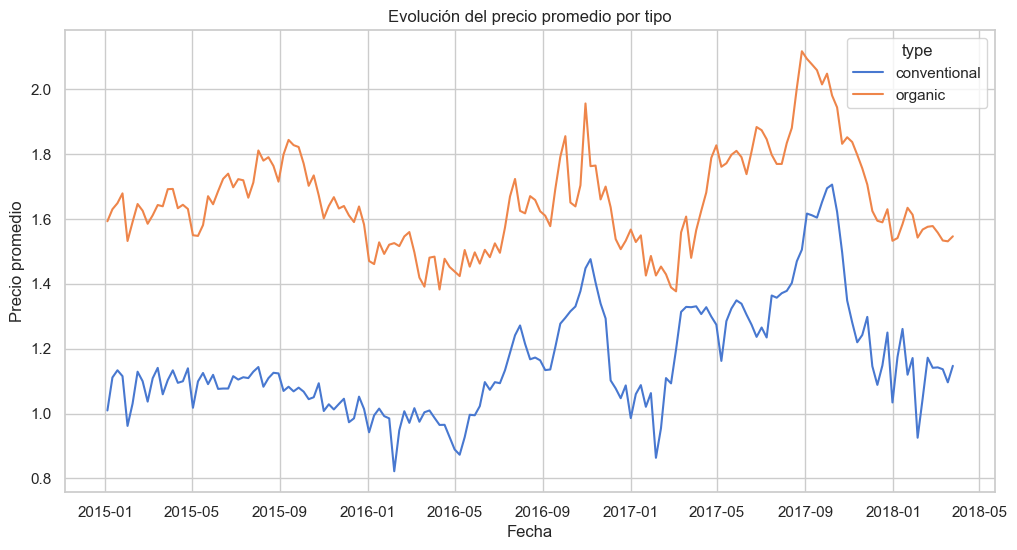

In [95]:
df_grouped = df.groupby(['Date', 'type'])['AveragePrice'].mean().reset_index()

sns.lineplot(data=df_grouped, x='Date', y='AveragePrice', hue='type')
plt.title("Evolución del precio promedio por tipo")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio")
plt.show()

# Evolución del precio promedio por tipo de aguacate (2015–2018)

## Descripción general

El gráfico de líneas compara la evolución temporal del **precio promedio** entre los aguacates **convencionales** y **orgánicos** desde 2015 hasta mediados de 2018.

- **Línea azul**: Precio de aguacates convencionales.
- **Línea naranja**: Precio de aguacates orgánicos.

## Insights clave

### 1. El aguacate orgánico siempre se vende a mayor precio
- A lo largo de todo el período, el precio de los orgánicos se mantiene **constantemente por encima** del convencional.
- En algunos picos, la diferencia entre ambos alcanza hasta **$0.60–$0.80 por unidad**.

### 2. Ambos tipos presentan estacionalidad similar
- Se observan **picos recurrentes** en los precios durante los **primeros trimestres de cada año** (especialmente notables en 2017 y 2018).
- Esta estacionalidad puede estar asociada con:
  - Temporadas de baja producción.
  - Alta demanda (por ejemplo, Super Bowl en febrero).

### 3. Variabilidad más pronunciada en precios orgánicos
- El precio del aguacate orgánico presenta **mayores fluctuaciones** que el convencional.
- Ejemplo: Entre 2016 y 2017, los orgánicos suben desde $1.4 a más de $2.1, mientras que los convencionales se mantienen más estables.

### 4. Eventos comunes que afectan a ambos tipos
- Se identifican **picos y caídas similares** en ambos tipos en fechas como:
  - **2016-09**
  - **2017-02 a 2017-09**
  - **2018-01**
- Esto indica que existen **factores externos compartidos**, como fenómenos climáticos, regulaciones o movimientos del mercado internacional.

## Recomendaciones para análisis futuro

1. **Calcular la diferencia promedio mensual entre tipos**:
   - ¿Cuánto más se paga por el orgánico mes a mes?

2. **Agregar eventos clave como variable contextual**:
   - Super Bowl, huracanes, tratados de comercio (NAFTA), etc.

3. **Modelar estacionalidad por separado**:
   - Ver si el comportamiento estacional es más marcado en un tipo que en otro.

4. **Análisis de volatilidad de precios**:
   - Determinar cuál tipo tiene precios más volátiles y cómo impacta esto en decisiones de compra y ventas.


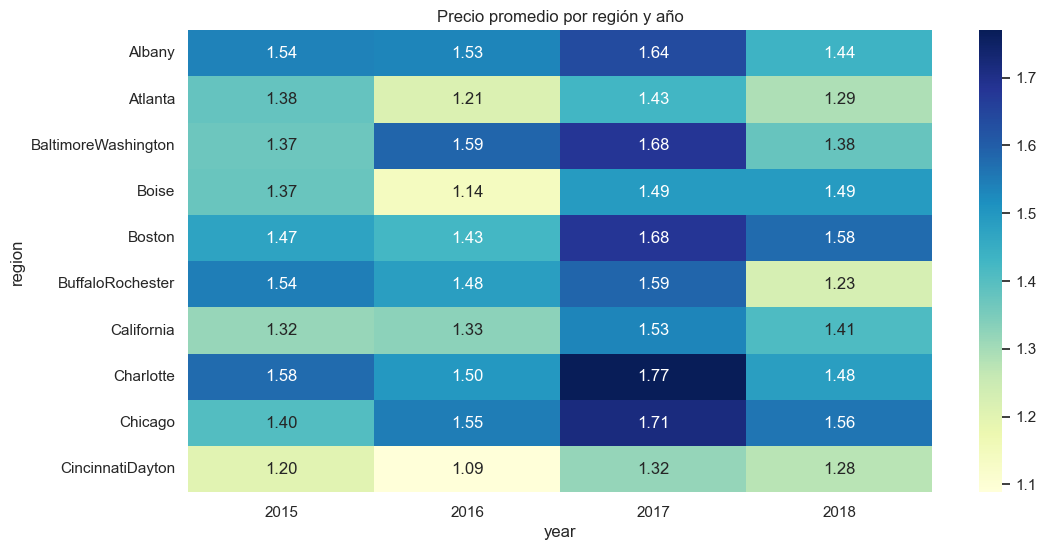

In [96]:
top_regions = df['region'].value_counts().head(10).index
df_top = df[df['region'].isin(top_regions)]

pivot = df_top.pivot_table(values='AveragePrice', index='region', columns='year')

sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Precio promedio por región y año")
plt.show()

# Análisis del precio promedio por región y año (2015–2018)

## Descripción general del gráfico

El heatmap representa la evolución del **precio promedio del aguacate** por año en distintas regiones de EE. UU., permitiendo comparar variaciones **temporales y geográficas**:

- **Filas**: Regiones del país.
- **Columnas**: Años (2015 a 2018).
- **Color**: Intensidad del precio promedio (más oscuro = mayor precio).

## Insights clave

### 1. Aumento generalizado de precios en 2017
- La mayoría de las regiones registran sus **precios más altos en 2017**, incluyendo:
  - **Charlotte (1.77 USD)** → el más alto del heatmap.
  - **Chicago (1.71 USD)**
  - **Boston (1.68 USD)**
  - **BaltimoreWashington (1.68 USD)**
- Esto indica un **evento común a nivel nacional** (escasez, incremento en demanda o restricciones de importación).

### 2. 2016 fue el año con mayor variabilidad regional
- Ejemplo:
  - Atlanta tuvo uno de los precios más bajos (**1.21 USD**),
  - BaltimoreWashington y Chicago alcanzaron precios altos (1.59–1.55).
- Sugerencia de impactos localizados: clima, distribución o preferencias de consumo.

### 3. Regiones con precios consistentemente altos
- **Charlotte, Albany, BuffaloRochester** se destacan con precios elevados en casi todos los años.
- Posibles factores:
  - Baja competencia o baja producción local.
  - Demanda por productos orgánicos o gourmet.

### 4. Regiones con precios consistentemente bajos
- **CincinnatiDayton y Atlanta** mantienen precios bajos, especialmente en 2015–2016:
  - CincinnatiDayton llega a **1.09 USD** en 2016, el mínimo del gráfico.

## Recomendaciones para análisis futuro

1. **Cruzar con tipo de aguacate**:
   - ¿Estas diferencias se deben a mayor venta de aguacates orgánicos en ciertas regiones?

2. **Incorporar datos climáticos y logísticos**:
   - Impacto de fenómenos meteorológicos o problemas de transporte en precios regionales.

3. **Detectar outliers estacionales en regiones concretas**:
   - Analizar qué eventos ocurrieron en 2017 que explican los picos en casi todo el país.

4. **Mapas geográficos**:
   - Visualizar estos datos sobre el mapa de EE. UU. para detectar patrones geográficos.



In [97]:
df = df.drop(columns=["Unnamed: 0"])

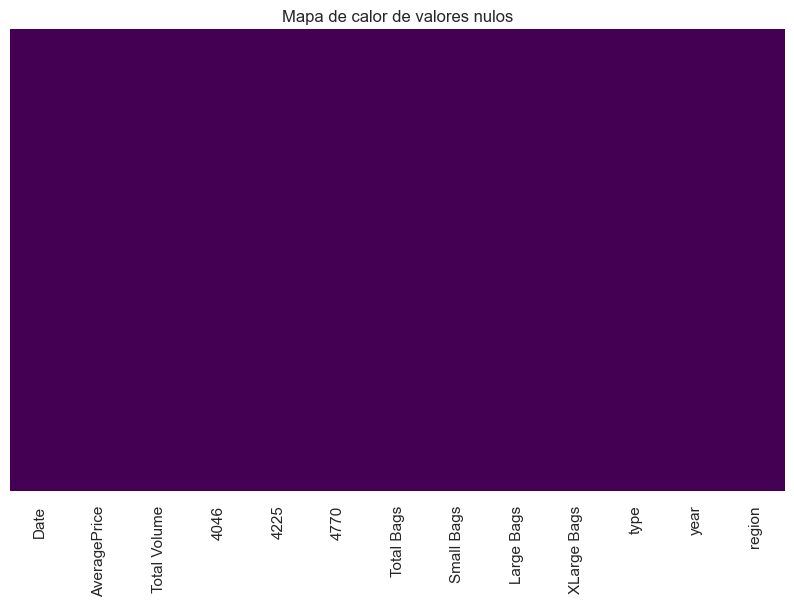

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

Correción de inconsistencias en texto, normalizar valores para mejor uniformidad

In [99]:
# normalización de variables categoricas
df["type"] = df["type"].str.strip().str.upper()
import re
df["region"] = (
    df["region"]
    .str.strip("-")
    .apply(lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x))  # Inserta _ antes de mayúsculas no iniciales
    .str.upper()
)

In [100]:
df.type.value_counts()

type
CONVENTIONAL    9126
ORGANIC         9123
Name: count, dtype: int64

In [101]:
df.region.value_counts()

region
ALBANY                  338
ATLANTA                 338
BALTIMORE_WASHINGTON    338
BOISE                   338
BOSTON                  338
BUFFALO_ROCHESTER       338
CALIFORNIA              338
CHARLOTTE               338
CHICAGO                 338
CINCINNATI_DAYTON       338
COLUMBUS                338
DALLAS_FT_WORTH         338
DENVER                  338
DETROIT                 338
GRAND_RAPIDS            338
GREAT_LAKES             338
HARRISBURG_SCRANTON     338
HARTFORD_SPRINGFIELD    338
HOUSTON                 338
INDIANAPOLIS            338
JACKSONVILLE            338
LAS_VEGAS               338
LOS_ANGELES             338
LOUISVILLE              338
MIAMI_FT_LAUDERDALE     338
MIDSOUTH                338
NASHVILLE               338
NEW_ORLEANS_MOBILE      338
NEW_YORK                338
NORTHEAST               338
NORTHERN_NEW_ENGLAND    338
ORLANDO                 338
PHILADELPHIA            338
PHOENIX_TUCSON          338
PITTSBURGH              338
PLAINS       